# 1. Setup and Data Preparation

In [ ]:
# Install necessary libraries (if not already installed in Colab)
!pip install -U scikit-learn gensim nltk

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import gensim
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Download required nltk data
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
#Loading the dataset
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,id,Review,Liked
0,NaN,Wow... Loved this place.,1
1,NaN,Crust is not good.,0
2,NaN,Not tasty and the texture was just nasty.,0
3,NaN,Stopped by during the late May bank holiday of...,1
4,NaN,The selection on the menu was great and so wer...,1


In [5]:
texts = df['Review']

# 2. Data Preprocessing

In [6]:
# Text preprocessing: tokenization, stop-word removal, etc.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to each text
processed_texts = texts.apply(preprocess_text)

# 3. Bag of Words (BoW)

In [7]:
# Create a BoW representation using CountVectorizer
vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda doc: doc, lowercase=False)
X_bow = vectorizer.fit_transform(processed_texts)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
# Convert the matrix to a DataFrame to inspect it
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

In [9]:
# Inspect the first few rows of the BoW matrix
print(bow_df.head())

   absolute  absolutely  absolutley  accident  accommodations  accomodate  \
0         0           0           0         0               0           0   
1         0           0           0         0               0           0   
2         0           0           0         0               0           0   
3         0           0           0         0               0           0   
4         0           0           0         0               0           0   

   accordingly  accountant  ache  acknowledged  ...  yelpers  yet  youd  \
0            0           0     0             0  ...        0    0     0   
1            0           0     0             0  ...        0    0     0   
2            0           0     0             0  ...        0    0     0   
3            0           0     0             0  ...        0    0     0   
4            0           0     0             0  ...        0    0     0   

   youll  youre  yucky  yukon  yum  yummy  zero  
0      0      0      0      0    0  

In [10]:
# Visualize the word frequencies
word_freq = np.array(X_bow.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

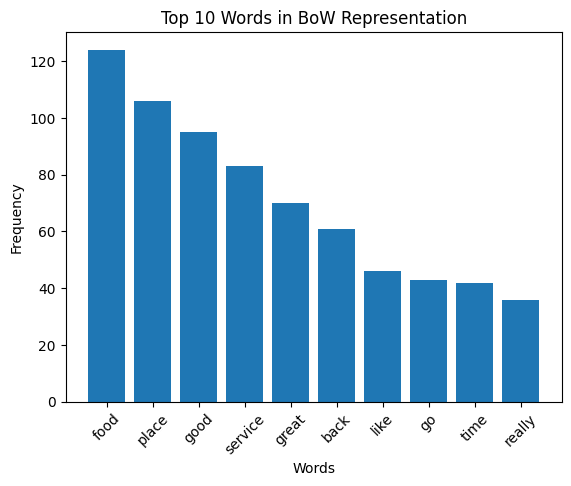

In [11]:
# Plot the top 10 frequent words
top_words = sorted(zip(word_freq, words), reverse=True)[:10]
top_words_freq, top_words_words = zip(*top_words)
plt.bar(top_words_words, top_words_freq)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in BoW Representation')
plt.xticks(rotation=45)
plt.show()

Conclusion : Representing text as word counts.

# 4.TF-IDF (Term Frequency-Inverse Document Frequency)

In [12]:
#Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(analyzer='word',tokenizer=lambda doc: doc, lowercase=False)
X_tfidf = tfidf_vectorizer.fit_transform(processed_texts)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
# Convert the matrix to a DataFrame to inspect it
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [14]:
# Inspect the first few rows of the TF-IDF matrix
print(tfidf_df.head())

   absolute  absolutely  absolutley  accident  accommodations  accomodate  \
0       0.0         0.0         0.0       0.0             0.0         0.0   
1       0.0         0.0         0.0       0.0             0.0         0.0   
2       0.0         0.0         0.0       0.0             0.0         0.0   
3       0.0         0.0         0.0       0.0             0.0         0.0   
4       0.0         0.0         0.0       0.0             0.0         0.0   

   accordingly  accountant  ache  acknowledged  ...  yelpers  yet  youd  \
0          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
1          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
2          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
3          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
4          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   

   youll  youre  yucky  yukon  yum  yummy  zero  
0    0.0    0.0    0.0    0.0  0.0  

In [15]:
# Analyze the importance of words
tfidf_values = np.array(X_tfidf.sum(axis=0)).flatten()
words = tfidf_vectorizer.get_feature_names_out()

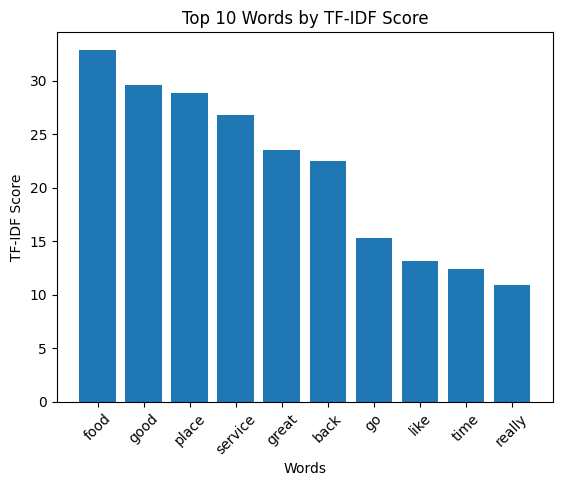

In [16]:
# Plot the top 10 words by TF-IDF score
top_tfidf = sorted(zip(tfidf_values, words), reverse=True)[:10]
top_tfidf_scores, top_tfidf_words = zip(*top_tfidf)
plt.bar(top_tfidf_words, top_tfidf_scores)
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 10 Words by TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

Conclusion : Highlights important words by considering frequency and document relevance.


# 5.Word2Vec

In [17]:
# Train a Word2Vec model using Gensim
model_w2v = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=1, sg=0)

In [18]:
# Get vector representation for a specific word
word_vector = model_w2v.wv['great']  # Replace 'great' with any word from the dataset

In [19]:
# Visualize word vectors for a few words (if available)
words = ['great', 'good', 'tasty', 'food']  # Replace with words in your dataset
word_vectors = [model_w2v.wv[word] for word in words]

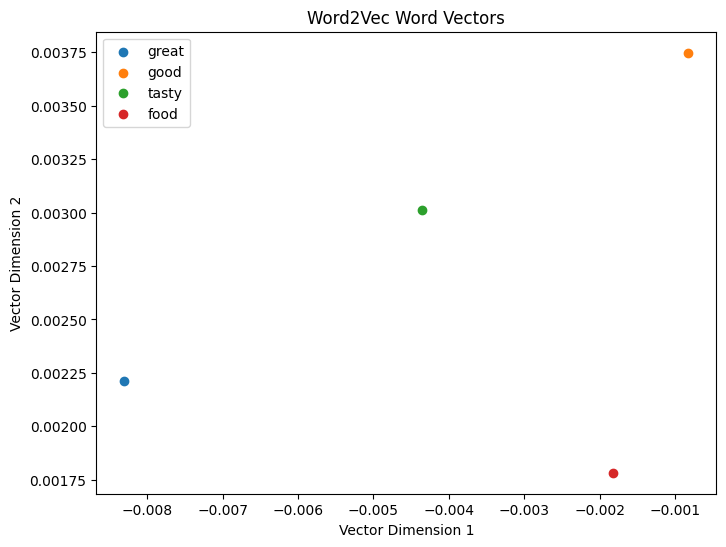

In [20]:
# Plot word vectors
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(word_vectors[i][0], word_vectors[i][1], label=word)
plt.legend()
plt.title('Word2Vec Word Vectors')
plt.xlabel('Vector Dimension 1')
plt.ylabel('Vector Dimension 2')
plt.show()

Conclusion : Generates dense word embeddings capturing semantic relationships between words.

# 6.GloVe

In [21]:
import gensim.downloader as api

In [22]:
# Load the GloVe model
glove = api.load("glove-wiki-gigaword-100")  # You can change to the desired size

[==================================================] 100.0% 128.1/128.1MB downloaded


In [27]:
# Download GloVe 100-dimensional embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Unzip the downloaded file
!unzip glove.6B.zip

--2025-07-05 14:08:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-05 14:08:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-05 14:08:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [28]:
# Define a function to load GloVe embeddings into a dictionary
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [29]:
# Load the 100-dimensional GloVe embeddings
glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

In [ ]:
# Load the 100-dimensional GloVe embeddings
glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

In [30]:
# Example: Get the vector for a specific word
word = "food"
vector = glove_embeddings.get(word, None)
print(f"Vector for '{word}':\n", vector)

Vector for 'food':
 [-1.6486e-01  9.1997e-01  2.2737e-01 -4.9031e-01 -1.8082e-03 -3.3803e-01
  5.7221e-02  1.4601e-01  4.0202e-01 -2.8858e-01 -4.7495e-01 -5.6369e-01
  2.7037e-01  5.1702e-01 -1.1241e-01  1.8314e-01  2.2066e-01 -4.8606e-01
 -8.7284e-01 -6.2587e-02  4.3016e-02  2.3641e-01  5.9705e-01 -3.8640e-01
 -2.5194e-01  9.6862e-01 -4.3112e-01 -4.8370e-01 -1.1396e+00  9.2425e-02
 -1.1476e-01 -7.4291e-02 -6.2524e-02 -9.5122e-02 -2.2714e-01  8.8291e-01
  3.9978e-01  7.6631e-01 -6.7697e-01 -6.2829e-01 -1.1872e-01 -2.4492e-01
 -5.8893e-01 -8.5088e-01  1.1107e+00  4.2190e-01 -1.5072e+00 -1.9509e-01
 -2.6712e-01 -7.0801e-01  5.5075e-01 -4.6929e-02 -2.5203e-01  7.4411e-01
 -1.8325e-01 -1.4885e+00 -4.6393e-01 -1.0338e-01  2.3525e+00 -1.5421e-01
  3.9833e-01  1.5344e-02  8.0708e-02 -2.7373e-01  9.7057e-01 -1.9383e-02
  2.0899e-01 -6.4033e-01  9.2509e-01 -4.5371e-01 -7.0564e-01 -1.6033e-01
 -7.1761e-02  6.2856e-01  3.5732e-01  8.8802e-01 -6.9127e-01  4.9634e-02
 -9.3347e-01  6.5396e-01  3.716

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
def cosine_sim(a, b):
    return cosine_similarity([a], [b])[0][0]

In [35]:
# Example: Calculate cosine similarity between two words
word1 = "food"
word2 = "good"

vector1 = glove_embeddings.get(word1, None)
vector2 = glove_embeddings.get(word2, None)

if vector1 is not None and vector2 is not None:
    similarity = cosine_sim(vector1, vector2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")
else:
    print("Word(s) not found in GloVe embeddings.")

Cosine similarity between 'food' and 'good': 0.5021809935569763


Conclusion : Uses global word co-occurrence statistics to generate word embeddings.This method effectively encodes both semantic and syntactic relationships, offering a comprehensive view of word meanings based on their broad usage patterns

# 7.FastText

In [36]:
# Train a FastText model using Gensim
model_ft = FastText(sentences=processed_texts, vector_size=100, window=5, min_count=1, sg=0)


In [38]:
# Get vector representation for a specific word (including subword information)
fasttext_vector = model_ft.wv['good']

In [39]:
 # Visualize FastText word vectors for a few words
words = ['good', 'food', 'great', 'service']
fasttext_vectors = [model_ft.wv[word] for word in words]


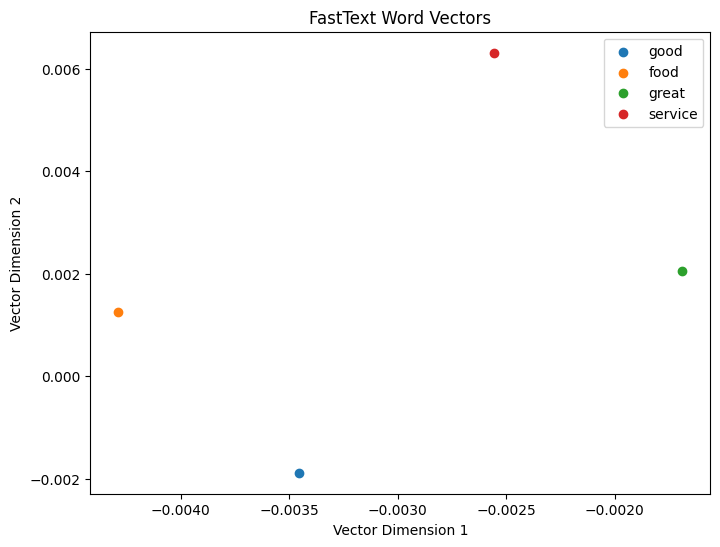

In [40]:
# Plot FastText word vectors
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(fasttext_vectors[i][0], fasttext_vectors[i][1], label=word)
plt.legend()
plt.title('FastText Word Vectors')
plt.xlabel('Vector Dimension 1')
plt.ylabel('Vector Dimension 2')
plt.show()

Conclusion : Enhances word embeddings by considering subword information, improving performance on rare words.
